# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions. * I did Q2 and Q4 *

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?


(I did Q1 above on a separate pdf also attached in the same github repository.)

---

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ForeignGifts_edu.csv to ForeignGifts_edu.csv


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# part 1 answer
df = pd.read_csv('ForeignGifts_edu.csv')
df.head() # look at the first 5 rows of the data to see the columns and entry formats

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [20]:
df['Foreign Gift Amount']

,Foreign Gift Amount
0,250000
1,463657
2,3649107
3,1000
4,49476
...,...
28216,381717
28217,444938
28218,1064580
28219,737375


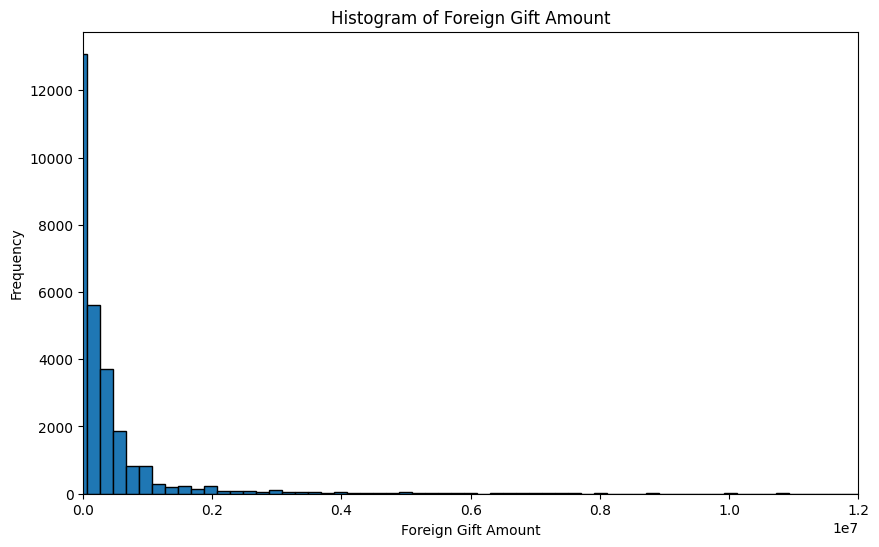

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


In [24]:
# part 2 answer

# first we need to clean the data and coerce errors
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors='coerce')

plt.figure(figsize=(10,6))
plt.hist(df['Foreign Gift Amount'], bins=500, edgecolor='black')
plt.xlim(0, 1.2e7)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Foreign Gift Amount')
plt.show()

df['Foreign Gift Amount'].describe() # describing the variable

Above, we see that most of the gift amounts are less than 1e6, but the fact that there are extremes at degrees of e7 and e8 skews the histogram.

In [26]:
# part 3 answer

gift_type_counts = df['Gift Type'].value_counts() # making a value counts table
print(gift_type_counts)
print('\n')

gift_type_proportions = gift_type_counts / gift_type_counts.sum() # calculating the proportions
print(gift_type_proportions)

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


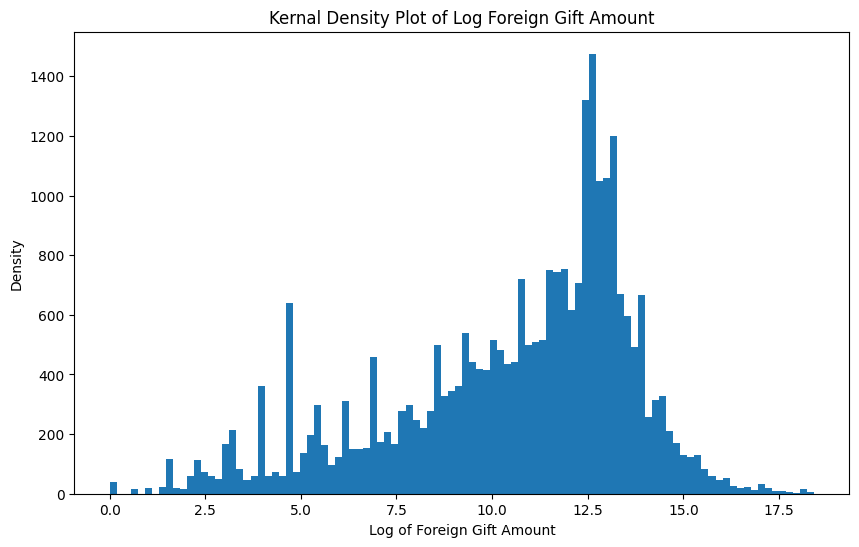

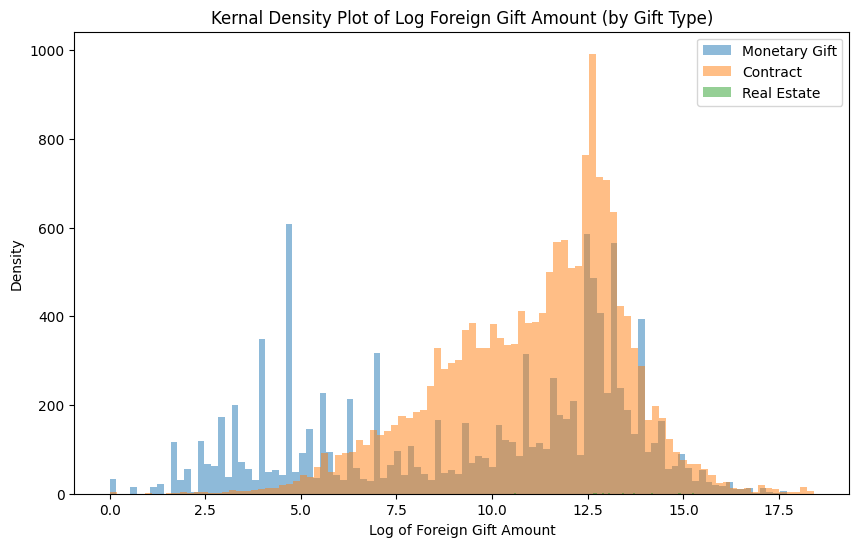

In [34]:
# part 4 answer

# plotting the kernal density plot for log Foreign Gift Amount
df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'])
plt.figure(figsize=(10,6))
plt.hist(df['Log Foreign Gift Amount'], bins=100)
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernal Density Plot of Log Foreign Gift Amount')
plt.show()

print('\n')

# plotting for log Foreign Gift Amount conditional on gift type
plt.figure(figsize=(10,6))
for gift_type in df['Gift Type'].unique():
    subset = df[df['Gift Type'] == gift_type]['Log Foreign Gift Amount']
    plt.hist(subset, bins=100, label=gift_type, alpha=0.5)
# I made the graph semi transparent so we can see the different gift types overlapping each other
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.title('Kernal Density Plot of Log Foreign Gift Amount (by Gift Type)')
plt.legend()
plt.show()

From above, it seems like the shape of the histogram of the total gift amounts (regardless of gift type) is a similar shape to the histogram for just the 'Contract' gift type. I wonder if this is only because there is the most Contract type gift data entries, and so it influences the general histogram more.

In [36]:
# question 5 answer

top_countries_by_count = df.groupby('Country of Giftor')['Foreign Gift Amount'].count().nlargest(15)
print ("Top 15 countries by number of gifts:\n")
print(top_countries_by_count)

top_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print ("\nTop 15 countries by gift amount:\n")
print(top_countries_by_amount)

Top 15 countries by number of gifts:

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: Foreign Gift Amount, dtype: int64

Top 15 countries by gift amount:

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
A

Top 15 institutions by total amount received:

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: in

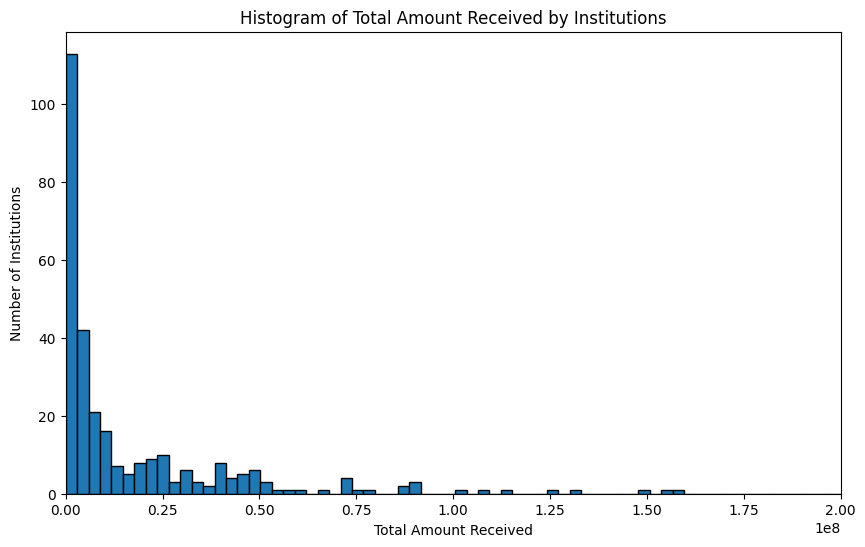

In [41]:
# question 6 answer

top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print ("Top 15 institutions by total amount received:\n")
print(top_institutions)
print('\n')

plt.figure(figsize=(10,6))
total_amounts = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.hist(total_amounts, bins=500, edgecolor='black')
plt.xlim(0,2e8)
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.title('Histogram of Total Amount Received by Institutions')
plt.show()

In [42]:
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print ("Top 15 giftors providing the most money:\n")
print(top_giftors)

Top 15 giftors providing the most money:

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


---

**Q3.** This question uses the Airbnb data to practice making visualizations (I chose to skip this question).

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

---

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [43]:
from google.colab import files
uploaded = files.upload()

Saving drilling_rigs.csv to drilling_rigs.csv


In [50]:
# part 1 answer
dt = pd.read_csv('drilling_rigs.csv')
dt.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973 January,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549
1,1973 February,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677
2,1973 March,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805
3,1973 April,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898
4,1973 May,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991


In [53]:
print(df.shape[0]) # number of observations
print(df.shape[1]) # number of variables

28221
11


In [54]:
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Month                                                                                        623 non-null    object
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64 
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64 
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   623 non-null    object
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 623 non-null    object
 5   Crude Oil and Natural Gas Rotary Rigs in Op

Since we have object(7), we have to convert the columns that are supposed to be numeric into numbers/floats (all except for month).

In [59]:
object_cols = ["Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)",
               "Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",
                "Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)",
                "Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)",
                "Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)",
                "Active Well Service Rig Count (Number of Rigs)"]

for col in object_cols:
  dt[col] = pd.to_numeric(dt[col], errors='coerce')  # convert objects to numeric

In [60]:
# check dtypes again
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Month                                                                                        623 non-null    object 
 1   Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                 623 non-null    int64  
 2   Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                623 non-null    int64  
 3   Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                   448 non-null    float64
 4   Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                 448 non-null    float64
 5   Crude Oil and Natural Gas Rotary Rig

In [61]:
print(dt.describe())
print('\n')
print(dt.isna().sum())

       Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)  \
count                                         623.000000                              
mean                                         1246.051364                              
std                                           700.532921                              
min                                           237.000000                              
25%                                           725.500000                              
50%                                           995.000000                              
75%                                          1707.500000                              
max                                          4238.000000                              

       Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)  \
count                                         623.000000                               
mean                                    

In [62]:
# part 2 answer

dt['time'] = pd.to_datetime(dt['Month'], format='mixed')

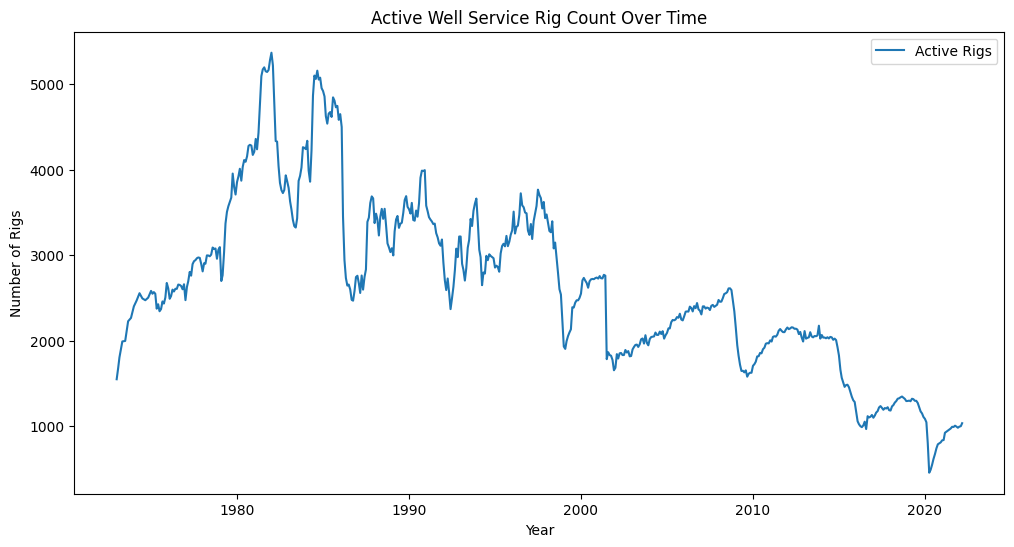

In [64]:
# part 3 answer

plt.figure(figsize=(12,6))
plt.plot(dt['time'], dt['Active Well Service Rig Count (Number of Rigs)'], label="Active Rigs")

plt.xlabel("Year")
plt.ylabel("Number of Rigs")
plt.title("Active Well Service Rig Count Over Time")
plt.legend()
plt.show()

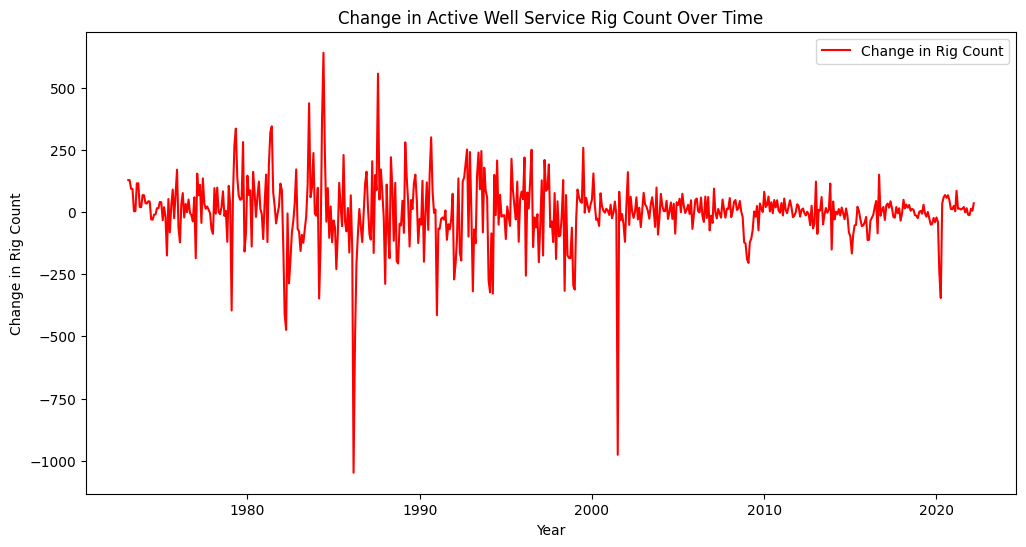

In [68]:
# part 4 answer

dt['rig_change'] = dt['Active Well Service Rig Count (Number of Rigs)'].diff()

plt.figure(figsize=(12,6))
plt.plot(dt['time'], dt['rig_change'], label="Change in Rig Count", color="red")
plt.xlabel("Year")
plt.ylabel("Change in Rig Count")
plt.title("Change in Active Well Service Rig Count Over Time")
plt.legend()

plt.show()

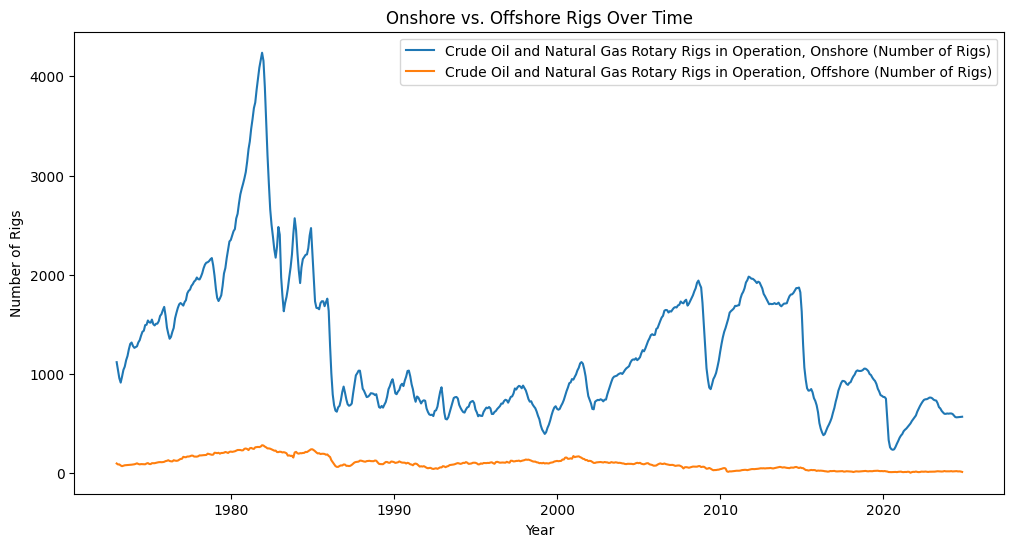

In [71]:
# part 5 answer

dt_melted = dt.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                     var_name='Rig Type', value_name='Count')

plt.figure(figsize=(12,6))
for rig_type in dt_melted['Rig Type'].unique():
    subset = dt_melted[dt_melted['Rig Type'] == rig_type]
    plt.plot(subset['time'], subset['Count'], label=rig_type)

plt.xlabel("Year")
plt.ylabel("Number of Rigs")
plt.title("Onshore vs. Offshore Rigs Over Time")
plt.legend()

plt.show()